<a href="https://colab.research.google.com/github/mmtog/Actividad-1-/blob/main/M1_Actividad_2Grecia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.9 MB/s

In [2]:
from funpymodeling.exploratory import freq_tbl

In [3]:
# Cargar archivo CSV de Barcelona
data = pd.read_csv("listings_Grecia.csv.gz")
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20240626035544,2024-06-26,city scrape,"3 bedrooms, 2 bathrooms, 2nd floor with elevator",The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/hosting/Hosti...,37177,...,4.90,4.58,4.75,00002433180,t,7,7,0,0,0.33
1,10990,https://www.airbnb.com/rooms/10990,20240626035544,2024-06-26,city scrape,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/miso/Hosting-...,37177,...,4.90,4.81,4.75,00002433169,t,7,7,0,0,0.54
2,10993,https://www.airbnb.com/rooms/10993,20240626035544,2024-06-26,city scrape,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.78,00002433010,t,7,7,0,0,0.67
3,10995,https://www.airbnb.com/rooms/10995,20240626035544,2024-06-26,city scrape,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/hosting/Hosti...,37177,...,4.87,4.83,4.80,00002433153,t,7,7,0,0,0.19
4,27262,https://www.airbnb.com/rooms/27262,20240626035544,2024-06-26,city scrape,Athens Quality Apartments - Ground floor apart...,THE MATTRESS - KING KOIL - Camden Luxury 160x2...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,37177,...,4.96,4.75,4.71,00002433111,t,7,7,0,0,0.17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13274 entries, 0 to 13273
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13274 non-null  int64  
 1   listing_url                                   13274 non-null  object 
 2   scrape_id                                     13274 non-null  int64  
 3   last_scraped                                  13274 non-null  object 
 4   source                                        13274 non-null  object 
 5   name                                          13274 non-null  object 
 6   description                                   13013 non-null  object 
 7   neighborhood_overview                         7680 non-null   object 
 8   picture_url                                   13274 non-null  object 
 9   host_id                                       13274 non-null 

In [5]:
#Elimino las columnas de url
data1= data.drop(["neighbourhood_group_cleansed","name","review_scores_communication", "latitude","longitude","beds","source","host_listings_count",  "number_of_reviews_l30d", "calculated_host_listings_count_shared_rooms", "instant_bookable", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "last_scraped","bathrooms_text","neighbourhood","host_location", "scrape_id", "host_about",'listing_url','picture_url',"host_url","host_thumbnail_url","host_picture_url","description","neighborhood_overview","license","calendar_updated","has_availability","first_review","last_review"], axis=1)
data1

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,10595,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,52,11,4.86,4.88,4.85,4.88,4.58,4.75,0.33
1,10990,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,78,13,4.82,4.84,4.86,4.91,4.81,4.75,0.54
2,10993,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,96,5,4.83,4.91,4.94,4.97,4.82,4.78,0.67
3,10995,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,32,2,4.81,4.97,4.90,4.90,4.83,4.80,0.19
4,27262,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,25,4,4.84,4.88,4.96,4.88,4.75,4.71,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,1186207868497771124,585439881,Παναγιωτης,2024-06-24,NaN,NaN,NaN,f,NaN,1,...,2024-06-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13270,1186422222204873375,294246168,Valentin & Valeria,2019-09-12,within an hour,90%,50%,f,South Kensington,5,...,2024-06-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13271,1186760705831141376,488084007,Zoia Living,2022-11-17,within an hour,97%,99%,f,NaN,49,...,2024-06-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13272,1186760814814835018,488084007,Zoia Living,2022-11-17,within an hour,97%,99%,f,NaN,49,...,2024-06-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Limitar numero máximo de filas
#pd.options.display.max_rows = None

In [6]:
data1.info()
#Identificar valores nulos por columna .isnull()
valores_nulos=data1.isnull().sum()
valores_nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13274 entries, 0 to 13273
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13274 non-null  int64  
 1   host_id                    13274 non-null  int64  
 2   host_name                  13274 non-null  object 
 3   host_since                 13274 non-null  object 
 4   host_response_time         12439 non-null  object 
 5   host_response_rate         12439 non-null  object 
 6   host_acceptance_rate       12714 non-null  object 
 7   host_is_superhost          12505 non-null  object 
 8   host_neighbourhood         5767 non-null   object 
 9   host_total_listings_count  13274 non-null  int64  
 10  host_verifications         13274 non-null  object 
 11  host_has_profile_pic       13274 non-null  object 
 12  host_identity_verified     13274 non-null  object 
 13  neighbourhood_cleansed     13274 non-null  obj

,0
id,0
host_id,0
host_name,0
host_since,0
host_response_time,835
host_response_rate,835
host_acceptance_rate,560
host_is_superhost,769
host_neighbourhood,7507
host_total_listings_count,0


In [7]:
# Realizar una copia del dataframe original para no modificarlo directamente
data2 = data1.copy()
# Sustituir valores nulos por "Unknown"
data2['host_response_time']=data2['host_response_time'].fillna('Unknown')
data2['host_response_rate']=data2['host_response_rate'].fillna('Unknown')
data2['host_acceptance_rate']=data2['host_acceptance_rate'].fillna('Unknown')
data2['host_is_superhost']=data2['host_is_superhost'].fillna('Unknown')
data2['host_neighbourhood']=data2['host_neighbourhood'].fillna('Unknown')
data2['bathrooms']=data2['bathrooms'].fillna('Unknown')
data2['bedrooms']=data2['bedrooms'].fillna('Unknown')

# Convertir la columna 'price' a numérica (quitar símbolos de dólar y convertir a float)
data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)
# Sustituir valores nulos en 'price' por la mediana de los precios
data2["price"]=data2["price"].fillna(round(data2["price"].median(),1))

# Sustituir valores nulos en 'reviews' por 0
data2['review_scores_rating']=data2['review_scores_rating'].fillna(0)
data2['reviews_per_month']=data2['reviews_per_month'].fillna(0)
data2['review_scores_value']=data2['review_scores_rating'].fillna(0)
data2['review_scores_accuracy']=data2['review_scores_accuracy'].fillna(0)
data2['review_scores_cleanliness']=data2['review_scores_cleanliness'].fillna(0)
data2['review_scores_location']=data2['review_scores_location'].fillna(0)
data2['review_scores_checkin']=data2['review_scores_checkin'].fillna(0)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13274 entries, 0 to 13273
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13274 non-null  int64  
 1   host_id                    13274 non-null  int64  
 2   host_name                  13274 non-null  object 
 3   host_since                 13274 non-null  object 
 4   host_response_time         13274 non-null  object 
 5   host_response_rate         13274 non-null  object 
 6   host_acceptance_rate       13274 non-null  object 
 7   host_is_superhost          13274 non-null  object 
 8   host_neighbourhood         13274 non-null  object 
 9   host_total_listings_count  13274 non-null  int64  
 10  host_verifications         13274 non-null  object 
 11  host_has_profile_pic       13274 non-null  object 
 12  host_identity_verified     13274 non-null  object 
 13  neighbourhood_cleansed     13274 non-null  obj

In [8]:
data2.head(5)

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,10595,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,52,11,4.86,4.88,4.85,4.88,4.58,4.86,0.33
1,10990,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,78,13,4.82,4.84,4.86,4.91,4.81,4.82,0.54
2,10993,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,96,5,4.83,4.91,4.94,4.97,4.82,4.83,0.67
3,10995,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,32,2,4.81,4.97,4.90,4.90,4.83,4.81,0.19
4,27262,37177,Emmanouil,2009-09-08,within an hour,100%,99%,t,Ambelokipi,10,...,2024-06-26,25,4,4.84,4.88,4.96,4.88,4.75,4.84,0.17


In [9]:
# Corroborar que ya no hay valores nulos en el dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_name,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_neighbourhood,0
host_total_listings_count,0


In [10]:
 Cualitativas=data2.iloc[:,[2,3,4,5,6,7,8,10,11,12,13,14,15,17,18,19,33]]
Cuantitativas=data2.iloc[:,[9,16,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42]]
otros=data2.iloc[:,[0,1]]

<Figure size 3000x800 with 0 Axes>

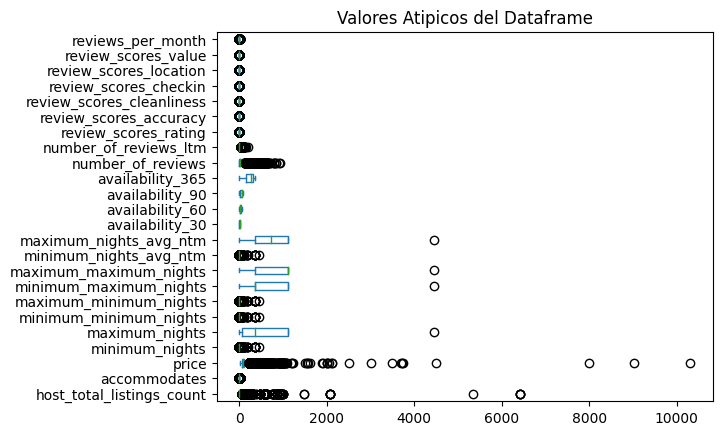

In [11]:
#Identificación y tratamiento de valores atípicos (outliers)

#Realizamos diagrama de caja y bigote de cada columna del dataframe
fig=plt.figure(figsize=(30,8))
Cuantitativas.plot(kind="box",vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [12]:
#Metodo aplicando cuartiles encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr=percentile75-percentile25

Limite_Superior= percentile75+1.5*iqr
Limite_Inferior=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_total_listings_count      64.500
accommodates                    7.000
price                         214.000
minimum_nights                  3.500
maximum_nights               2722.500
minimum_minimum_nights          3.500
maximum_minimum_nights          6.000
minimum_maximum_nights       2265.000
maximum_maximum_nights       2265.000
minimum_nights_avg_ntm          4.250
maximum_nights_avg_ntm       2265.000
availability_30                46.500
availability_60                96.500
availability_90               144.000
availability_365              567.500
number_of_reviews             140.500
number_of_reviews_ltm          48.500
review_scores_rating            5.650
review_scores_accuracy          5.550
review_scores_cleanliness       5.700
review_scores_checkin           5.390
review_scores_location          5.880
review_scores_value             5.650
reviews_per_month               5.515
dtype: float64
Limite inferior permitido host_total_listings_c

In [13]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Cuantitativas1

,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,...,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,10.0,NaN,108.0,1.0,180.0,1.0,4.0,180.0,180.0,1.7,...,140,52.0,11.0,4.86,4.88,4.85,4.88,4.58,4.86,0.33
1,10.0,4.0,136.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,2.0,...,158,78.0,13.0,4.82,4.84,4.86,4.91,4.81,4.82,0.54
2,10.0,2.0,67.0,1.0,90.0,1.0,3.0,90.0,90.0,1.4,...,172,96.0,5.0,4.83,4.91,4.94,4.97,4.82,4.83,0.67
3,10.0,4.0,78.0,1.0,45.0,1.0,3.0,45.0,45.0,1.4,...,142,32.0,2.0,4.81,4.97,4.90,4.90,4.83,4.81,0.19
4,10.0,2.0,58.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,2.0,...,172,25.0,4.0,4.84,4.88,4.96,4.88,4.75,4.84,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,1.0,4.0,56.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,...,365,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
13270,5.0,2.0,18.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,...,269,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
13271,49.0,2.0,99.0,1.0,365.0,2.0,2.0,365.0,365.0,2.0,...,329,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00
13272,49.0,2.0,100.0,1.0,365.0,2.0,2.0,365.0,365.0,2.0,...,329,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [14]:
# Identificar valores nulos por columna después de eliminar outliers
valores_nulos_outliers = Cuantitativas1.isnull().sum()
valores_nulos_outliers

,0
host_total_listings_count,1500
accommodates,507
price,1013
minimum_nights,898
maximum_nights,1
minimum_minimum_nights,758
maximum_minimum_nights,501
minimum_maximum_nights,1
maximum_maximum_nights,1
minimum_nights_avg_ntm,703


In [15]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,...,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,reviews_per_month
0,10.0,3.5,108.0,1.0,180.0,1.0,4.0,180.0,180.0,1.7,...,140,52.0,11.0,4.86,4.88,4.85,4.88,4.58,4.86,0.33
1,10.0,4.0,136.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,2.0,...,158,78.0,13.0,4.82,4.84,4.86,4.91,4.81,4.82,0.54
2,10.0,2.0,67.0,1.0,90.0,1.0,3.0,90.0,90.0,1.4,...,172,96.0,5.0,4.83,4.91,4.94,4.97,4.82,4.83,0.67
3,10.0,4.0,78.0,1.0,45.0,1.0,3.0,45.0,45.0,1.4,...,142,32.0,2.0,4.81,4.97,4.90,4.90,4.83,4.81,0.19
4,10.0,2.0,58.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,2.0,...,172,25.0,4.0,4.84,4.88,4.96,4.88,4.75,4.84,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,1.0,4.0,56.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,...,365,0.0,0.0,4.80,4.90,4.80,4.90,4.70,4.80,0.00
13270,5.0,2.0,18.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,...,269,0.0,0.0,4.80,4.90,4.80,4.90,4.70,4.80,0.00
13271,49.0,2.0,99.0,1.0,365.0,2.0,2.0,365.0,365.0,2.0,...,329,0.0,0.0,4.80,4.90,4.80,4.90,4.70,4.80,0.00
13272,49.0,2.0,100.0,1.0,365.0,2.0,2.0,365.0,365.0,2.0,...,329,0.0,0.0,4.80,4.90,4.80,4.90,4.70,4.80,0.00


In [16]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cuantitativas_limpio.isnull().sum()
valores_nulos_final

,0
host_total_listings_count,0
accommodates,0
price,0
minimum_nights,0
maximum_nights,0
minimum_minimum_nights,0
maximum_minimum_nights,0
minimum_maximum_nights,0
maximum_maximum_nights,0
minimum_nights_avg_ntm,0


In [17]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cualitativas.isnull().sum()
valores_nulos_final

,0
host_name,0
host_since,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_neighbourhood,0
host_verifications,0
host_has_profile_pic,0
host_identity_verified,0


In [18]:
Valores_limpios=pd.concat([Cuantitativas_limpio,Cualitativas,otros],axis=1)
Valores_limpios

,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,...,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,amenities,calendar_last_scraped,id,host_id
0,10.0,3.5,108.0,1.0,180.0,1.0,4.0,180.0,180.0,1.7,...,t,ΑΜΠΕΛΟΚΗΠΟΙ,Entire condo,Entire home/apt,2.0,3.0,"[""Ethernet connection"", ""Room-darkening shades...",2024-06-26,10595,37177
1,10.0,4.0,136.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,2.0,...,t,ΑΜΠΕΛΟΚΗΠΟΙ,Entire rental unit,Entire home/apt,1.0,1.0,"[""Ethernet connection"", ""43 inch HDTV"", ""Priva...",2024-06-26,10990,37177
2,10.0,2.0,67.0,1.0,90.0,1.0,3.0,90.0,90.0,1.4,...,t,ΑΜΠΕΛΟΚΗΠΟΙ,Entire rental unit,Entire home/apt,1.0,0.0,"[""Ethernet connection"", ""43 inch HDTV"", ""Priva...",2024-06-26,10993,37177
3,10.0,4.0,78.0,1.0,45.0,1.0,3.0,45.0,45.0,1.4,...,t,ΑΜΠΕΛΟΚΗΠΟΙ,Entire rental unit,Entire home/apt,1.0,1.0,"[""Ethernet connection"", ""Private patio or balc...",2024-06-26,10995,37177
4,10.0,2.0,58.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,2.0,...,t,ΑΜΠΕΛΟΚΗΠΟΙ,Entire rental unit,Entire home/apt,1.0,1.0,"[""Other electric stove"", ""Room-darkening shade...",2024-06-26,27262,37177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,1.0,4.0,56.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,...,f,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire rental unit,Entire home/apt,1.0,1.0,"[""Lockbox"", ""Smoking allowed"", ""Pets allowed"",...",2024-06-26,1186207868497771124,585439881
13270,5.0,2.0,18.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,...,t,ΠΑΤΗΣΙΑ,Private room in rental unit,Private room,1.0,1.0,"[""Refrigerator"", ""Dishes and silverware"", ""Win...",2024-06-26,1186422222204873375,294246168
13271,49.0,2.0,99.0,1.0,365.0,2.0,2.0,365.0,365.0,2.0,...,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire rental unit,Entire home/apt,1.0,1.0,"[""Room-darkening shades"", ""Cleaning products"",...",2024-06-26,1186760705831141376,488084007
13272,49.0,2.0,100.0,1.0,365.0,2.0,2.0,365.0,365.0,2.0,...,t,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire rental unit,Entire home/apt,1.0,1.0,"[""Room-darkening shades"", ""Cleaning products"",...",2024-06-26,1186760814814835018,488084007


In [19]:
Valores_limpios.to_csv("Grecia_limpios_final.csv")

In [20]:
# Reemplazar 'unknown' por NaN
Valores_limpios['host_response_rate'] = Valores_limpios['host_response_rate'].replace('Unknown', np.nan)

# Eliminar el símbolo '%' y convertir a float
Valores_limpios['host_response_rate'] = Valores_limpios['host_response_rate'].str.replace('%', '').astype(float)

# Rellenar NaN con la media
Valores_limpios['host_response_rate'].fillna(Valores_limpios['host_response_rate'].median(), inplace=True)

<ipython-input-20-5e5c167e233a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Valores_limpios['host_response_rate'].fillna(Valores_limpios['host_response_rate'].median(), inplace=True)


In [21]:
# Reemplazar 'unknown' por NaN
Valores_limpios['host_acceptance_rate'] = Valores_limpios['host_acceptance_rate'].replace('Unknown', np.nan)

# Eliminar el símbolo '%' y convertir a float
Valores_limpios['host_acceptance_rate'] = Valores_limpios['host_acceptance_rate'].str.replace('%', '').astype(float)

# Rellenar NaN con la media
Valores_limpios['host_acceptance_rate'].fillna(Valores_limpios['host_acceptance_rate'].median(), inplace=True)

<ipython-input-21-19f6dbc09f5c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Valores_limpios['host_acceptance_rate'].fillna(Valores_limpios['host_acceptance_rate'].median(), inplace=True)
